In [1]:
#Dependencies 
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import requests
from citipy import citipy 
import random
import time as time 

In [2]:
#Import api_key 
from config import api_key

In [3]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude:
    # Latitude in degrees is -90 and +90 
    # Longitude is in the range -180 and +180 

#Creating a dataframe to display the values
cities_df = pd.DataFrame(columns =
                            ['City',
                             'Latitudes',
                             'Longitudes',
                            ])
#Creating a list to hold the variables 
lat = []
lng = []
cities = []

#Creating loops to go through random lat and lng and assigning cities based on coordinates picked
    #2000 was chosen in order to ensure that atleast 500 would be unique (non-repeat) cities
for x in range(0,2000):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))
cities_df['Latitudes']  = lat
cities_df['Longitudes'] = lng

for index, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitudes"],row["Longitudes"])
    cities.append(city.city_name)
cities_df['City'] = cities

#Displaying the top five 
cities_df.head()

,City,Latitudes,Longitudes
0,port alfred,-83.116052,41.423236
1,ushuaia,-72.725555,-67.157955
2,saint-augustin,55.513625,-59.669481
3,qaqortoq,56.787482,-49.161251
4,erdenet,48.236135,104.984722


In [4]:
#Dropping duplicates and NaN values from the data set
new_cities_df = cities_df.drop_duplicates("City", keep = "first")
new_cities_df =  new_cities_df.dropna(axis= 1, how = 'all')
len(new_cities_df)

757

In [5]:
#Creating empty lists to hold the information
temp = []
wind_speed = []
cloudiness = []
humidity = []

#Calling the API and creating a loop to go through all the cities and extract needed information
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

counter = 0 

for index, row in new_cities_df.iterrows():
    try: 
        target_url = base_url + row["City"] + "&units=imperial" + "&appid="+ api_key
        time.sleep(1)
        response = requests.get(target_url).json()
        temp.append(response["main"]["temp"])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
    except: 
        new_cities_df.drop(index, inplace = True)
        pass 
    
    print("We are on city number " + str(counter))
    counter = counter + 1 
    print("This is the city: " + row['City'])
    print(target_url)  

We are on city number 0
This is the city: port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 1
This is the city: ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 2
This is the city: saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 3
This is the city: qaqortoq
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 4
This is the city: erdenet
http://api.openweathermap.org/data/2.5/weather?q=erdenet&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 5
This is the city: mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on 

We are on city number 50
This is the city: dikson
http://api.openweathermap.org/data/2.5/weather?q=dikson&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 51
This is the city: kaeo
http://api.openweathermap.org/data/2.5/weather?q=kaeo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 52
This is the city: yar-sale
http://api.openweathermap.org/data/2.5/weather?q=yar-sale&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 53
This is the city: xinxiang
http://api.openweathermap.org/data/2.5/weather?q=xinxiang&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 54
This is the city: thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 55
This is the city: meyungs
http://api.openweathermap.org/data/2.5/weather?q=meyungs&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 56
This 

We are on city number 101
This is the city: kisangani
http://api.openweathermap.org/data/2.5/weather?q=kisangani&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 102
This is the city: bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 103
This is the city: tuatapere
http://api.openweathermap.org/data/2.5/weather?q=tuatapere&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 104
This is the city: gobabis
http://api.openweathermap.org/data/2.5/weather?q=gobabis&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 105
This is the city: aquiraz
http://api.openweathermap.org/data/2.5/weather?q=aquiraz&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 106
This is the city: guaymas
http://api.openweathermap.org/data/2.5/weather?q=guaymas&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city num

We are on city number 151
This is the city: xichang
http://api.openweathermap.org/data/2.5/weather?q=xichang&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 152
This is the city: chimbote
http://api.openweathermap.org/data/2.5/weather?q=chimbote&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 153
This is the city: carnarvon
http://api.openweathermap.org/data/2.5/weather?q=carnarvon&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 154
This is the city: husavik
http://api.openweathermap.org/data/2.5/weather?q=husavik&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 155
This is the city: yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 156
This is the city: shelburne
http://api.openweathermap.org/data/2.5/weather?q=shelburne&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We a

We are on city number 200
This is the city: san quintin
http://api.openweathermap.org/data/2.5/weather?q=san quintin&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 201
This is the city: meulaboh
http://api.openweathermap.org/data/2.5/weather?q=meulaboh&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 202
This is the city: berbera
http://api.openweathermap.org/data/2.5/weather?q=berbera&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 203
This is the city: matiguas
http://api.openweathermap.org/data/2.5/weather?q=matiguas&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 204
This is the city: miri
http://api.openweathermap.org/data/2.5/weather?q=miri&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 205
This is the city: asau
http://api.openweathermap.org/data/2.5/weather?q=asau&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 

We are on city number 251
This is the city: maniitsoq
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 252
This is the city: tromso
http://api.openweathermap.org/data/2.5/weather?q=tromso&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 253
This is the city: plettenberg bay
http://api.openweathermap.org/data/2.5/weather?q=plettenberg bay&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 254
This is the city: niono
http://api.openweathermap.org/data/2.5/weather?q=niono&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 255
This is the city: bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 256
This is the city: jumla
http://api.openweathermap.org/data/2.5/weather?q=jumla&units=imperial&appid=288bd40bdc806164c2b347c489a98

We are on city number 301
This is the city: kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?q=kasongo-lunda&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 302
This is the city: hirara
http://api.openweathermap.org/data/2.5/weather?q=hirara&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 303
This is the city: baghdad
http://api.openweathermap.org/data/2.5/weather?q=baghdad&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 304
This is the city: ereymentau
http://api.openweathermap.org/data/2.5/weather?q=ereymentau&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 305
This is the city: travnik
http://api.openweathermap.org/data/2.5/weather?q=travnik&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 306
This is the city: east london
http://api.openweathermap.org/data/2.5/weather?q=east london&units=imperial&appid=288bd40bdc806164c2b347c489a98cf

We are on city number 351
This is the city: cairns
http://api.openweathermap.org/data/2.5/weather?q=cairns&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 352
This is the city: lira
http://api.openweathermap.org/data/2.5/weather?q=lira&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 353
This is the city: tokur
http://api.openweathermap.org/data/2.5/weather?q=tokur&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 354
This is the city: ardesen
http://api.openweathermap.org/data/2.5/weather?q=ardesen&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 355
This is the city: vagur
http://api.openweathermap.org/data/2.5/weather?q=vagur&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 356
This is the city: marijampole
http://api.openweathermap.org/data/2.5/weather?q=marijampole&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 357
This

We are on city number 402
This is the city: waverly
http://api.openweathermap.org/data/2.5/weather?q=waverly&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 403
This is the city: san patricio
http://api.openweathermap.org/data/2.5/weather?q=san patricio&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 404
This is the city: cao bang
http://api.openweathermap.org/data/2.5/weather?q=cao bang&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 405
This is the city: tunxi
http://api.openweathermap.org/data/2.5/weather?q=tunxi&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 406
This is the city: fort nelson
http://api.openweathermap.org/data/2.5/weather?q=fort nelson&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 407
This is the city: mombetsu
http://api.openweathermap.org/data/2.5/weather?q=mombetsu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We a

We are on city number 452
This is the city: alta floresta
http://api.openweathermap.org/data/2.5/weather?q=alta floresta&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 453
This is the city: atka
http://api.openweathermap.org/data/2.5/weather?q=atka&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 454
This is the city: axim
http://api.openweathermap.org/data/2.5/weather?q=axim&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 455
This is the city: solnechnyy
http://api.openweathermap.org/data/2.5/weather?q=solnechnyy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 456
This is the city: rawson
http://api.openweathermap.org/data/2.5/weather?q=rawson&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 457
This is the city: avera
http://api.openweathermap.org/data/2.5/weather?q=avera&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 

We are on city number 502
This is the city: maraa
http://api.openweathermap.org/data/2.5/weather?q=maraa&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 503
This is the city: kuala terengganu
http://api.openweathermap.org/data/2.5/weather?q=kuala terengganu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 504
This is the city: arlit
http://api.openweathermap.org/data/2.5/weather?q=arlit&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 505
This is the city: qostanay
http://api.openweathermap.org/data/2.5/weather?q=qostanay&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 506
This is the city: morro bay
http://api.openweathermap.org/data/2.5/weather?q=morro bay&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 507
This is the city: abnub
http://api.openweathermap.org/data/2.5/weather?q=abnub&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on 

We are on city number 552
This is the city: kamaishi
http://api.openweathermap.org/data/2.5/weather?q=kamaishi&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 553
This is the city: vilhena
http://api.openweathermap.org/data/2.5/weather?q=vilhena&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 554
This is the city: port macquarie
http://api.openweathermap.org/data/2.5/weather?q=port macquarie&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 555
This is the city: baripada
http://api.openweathermap.org/data/2.5/weather?q=baripada&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 556
This is the city: polson
http://api.openweathermap.org/data/2.5/weather?q=polson&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 557
This is the city: port augusta
http://api.openweathermap.org/data/2.5/weather?q=port augusta&units=imperial&appid=288bd40bdc806164c2b347c489a98

We are on city number 602
This is the city: cockburn harbour
http://api.openweathermap.org/data/2.5/weather?q=cockburn harbour&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 603
This is the city: yuzhno-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?q=yuzhno-yeniseyskiy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 604
This is the city: margate
http://api.openweathermap.org/data/2.5/weather?q=margate&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 605
This is the city: nioki
http://api.openweathermap.org/data/2.5/weather?q=nioki&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 606
This is the city: barbar
http://api.openweathermap.org/data/2.5/weather?q=barbar&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 607
This is the city: blagoyevo
http://api.openweathermap.org/data/2.5/weather?q=blagoyevo&units=imperial&appid=288bd40bdc806164c

We are on city number 652
This is the city: kannauj
http://api.openweathermap.org/data/2.5/weather?q=kannauj&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 653
This is the city: broken hill
http://api.openweathermap.org/data/2.5/weather?q=broken hill&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 654
This is the city: ilebo
http://api.openweathermap.org/data/2.5/weather?q=ilebo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 655
This is the city: gaozhou
http://api.openweathermap.org/data/2.5/weather?q=gaozhou&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 656
This is the city: elizabeth city
http://api.openweathermap.org/data/2.5/weather?q=elizabeth city&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 657
This is the city: tarbolton
http://api.openweathermap.org/data/2.5/weather?q=tarbolton&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6


We are on city number 702
This is the city: puqi
http://api.openweathermap.org/data/2.5/weather?q=puqi&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 703
This is the city: rocky mountain house
http://api.openweathermap.org/data/2.5/weather?q=rocky mountain house&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 704
This is the city: nacala
http://api.openweathermap.org/data/2.5/weather?q=nacala&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 705
This is the city: kuching
http://api.openweathermap.org/data/2.5/weather?q=kuching&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 706
This is the city: nishihara
http://api.openweathermap.org/data/2.5/weather?q=nishihara&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 707
This is the city: yaqui
http://api.openweathermap.org/data/2.5/weather?q=yaqui&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We a

We are on city number 752
This is the city: virginia beach
http://api.openweathermap.org/data/2.5/weather?q=virginia beach&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 753
This is the city: tyssedal
http://api.openweathermap.org/data/2.5/weather?q=tyssedal&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 754
This is the city: asyut
http://api.openweathermap.org/data/2.5/weather?q=asyut&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 755
This is the city: chama
http://api.openweathermap.org/data/2.5/weather?q=chama&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 756
This is the city: bubaque
http://api.openweathermap.org/data/2.5/weather?q=bubaque&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6


In [6]:
#Creating a data frame to hold all the output values
new_cities_df["Temperature"] = temp 
new_cities_df["Wind Speed"] = wind_speed
new_cities_df["Cloudiness"] = cloudiness
new_cities_df["Humidity"] = humidity
new_cities_df.head()

,City,Latitudes,Longitudes,Temperature,Wind Speed,Cloudiness,Humidity
0,port alfred,-83.116052,41.423236,70.42,13.47,80,94
1,ushuaia,-72.725555,-67.157955,39.20,17.22,90,93
2,saint-augustin,55.513625,-59.669481,50.81,11.41,0,87
3,qaqortoq,56.787482,-49.161251,41.00,8.05,80,30
4,erdenet,48.236135,104.984722,25.06,4.74,0,47


In [7]:
#Saving the data output to a csv file 
output_data_file = "WeatherPy_DataOutput.csv"
new_cities_df.to_csv(output_data_file, index_label="City Number")

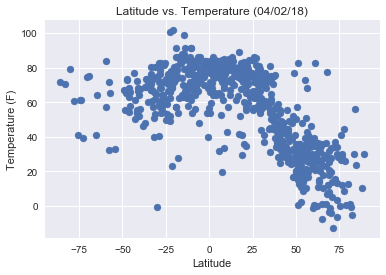

In [9]:
#Latitude Vs Temperature Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Temperature"],marker ="o")
plt.title(("Latitude vs. Temperature (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

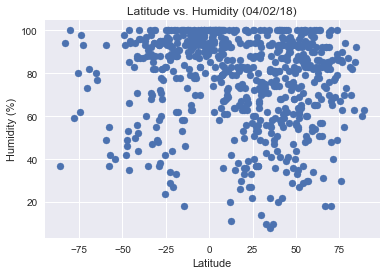

In [10]:
#Latitude vs. Humidity Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Humidity"],marker ="o")
plt.title(("Latitude vs. Humidity (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.savefig("Latitude_vs_Humiditiy.png")
plt.show()

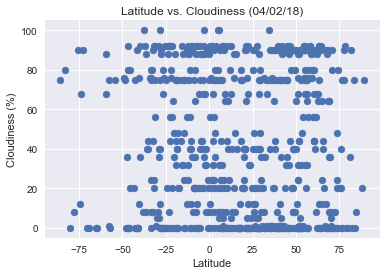

In [11]:
#Latitude vs. Cloudiness Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Cloudiness"],marker ="o")
plt.title(("Latitude vs. Cloudiness (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

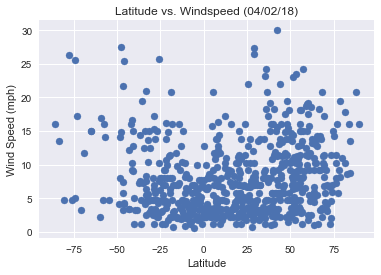

In [12]:
#Latitude vs. Wind Speed Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"], new_cities_df["Wind Speed"],marker ="o")
plt.title(("Latitude vs. Windspeed (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()